<a href="https://colab.research.google.com/github/Superkid0714/ML-DL_practice/blob/main/%EC%8A%A4%ED%8C%B8_%EB%A9%94%EC%9D%BC_%EB%B6%84%EB%A5%98%EA%B8%B0_(Spam_Detection)_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 배열
import numpy as np

# 데이터 분석
import pandas as pd

In [ ]:
# Pandas option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

In [ ]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Jupyter note상에 그래프 결과 포함 매직 명령
%matplotlib inline

# Matplotlib 기본 글꼴 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
import sys

# 노트북이 코랩에서 실행 중인지 체크합니다.
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

#     # 나눔바른고딕 폰트로 설정합니다.
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumBarunGothic')

#     # 마이너스 기호 표시 오류 수정
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
# 경고 문제 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [ ]:
# Tensorflow
import tensorflow as tf

tf.__version__

'2.15.0'

In [ ]:
# Tensorflow Sequential model
from tensorflow.keras.models import Sequential, Model, load_model

from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.layers import Rescaling, Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional

from tensorflow.keras import optimizers, regularizers

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from tensorflow.keras.utils import plot_model, to_categorical

In [ ]:
# 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split

In [ ]:
def disp_training( history ):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( accuracy ) + 1 )

    plt.title( '훈련 및 검증 정확도' )
    plt.plot( epochs, history.history[ 'accuracy' ], label = 'accuracy' )
    plt.plot( epochs, history.history[ 'val_accuracy' ], label = 'val_accuracy' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.figure()
    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

In [ ]:
def disp_loss( history ):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( loss ) + 1 )

    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

# 스팸 메일 분류기( Spam Detection )

* 데이터 출처 : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 데이터 준비 / 데이터 이해 / 데이터 전처리

In [ ]:
data = pd.read_csv( 'spam.csv', encoding = 'latin1' )
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,Go until jurong ...,NaN,NaN,NaN
1,ham,Ok lar... Joking...,NaN,NaN,NaN
2,spam,Free entry in 2 ...,NaN,NaN,NaN
3,ham,U dun say so ear...,NaN,NaN,NaN
4,ham,Nah I don't thin...,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


* 불필요한 변수 삭제

In [ ]:
data.drop( [ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' ],
                  axis = 1, inplace = True )

In [ ]:
data.head()

,v1,v2
0,ham,Go until jurong ...
1,ham,Ok lar... Joking...
2,spam,Free entry in 2 ...
3,ham,U dun say so ear...
4,ham,Nah I don't thin...


* v1 변수 내용을 0, 1로 변경
    * ham : 0
    * spam : 1

In [ ]:
data[ 'v1' ].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
data[ 'v1' ] = data[ 'v1' ].replace( [ 'ham', 'spam' ], [ 0, 1 ] )

data[ 'v1' ].unique()

array([0, 1])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


* 결측치 확인

In [ ]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
data.isnull().values.any()

False

In [ ]:
data.isnull().mean()

v1    0.0
v2    0.0
dtype: float64

* 중복 데이터 확인

In [ ]:
data[ 'v2' ].count()    # v2 변수 총 데이터 수

5572

In [ ]:
data[ 'v2' ].nunique()  # v2 변수 중복 제거 데이터 수

5169

In [ ]:
print( f"중복 데이터 수 : {data[ 'v2' ].count()  - data[ 'v2' ].nunique()}" )

중복 데이터 수 : 403


In [ ]:
data.drop_duplicates( subset = [ 'v2' ], inplace = True )

print( f"중복 제거 후 샘플 수 : {data[ 'v2' ].count()}" )

중복 제거 후 샘플 수 : 5169


* 데이터 이해

v1 변수 데이터 분포 : v1
0    4516
1     653
Name: count, dtype: int64


<Axes: xlabel='v1'>

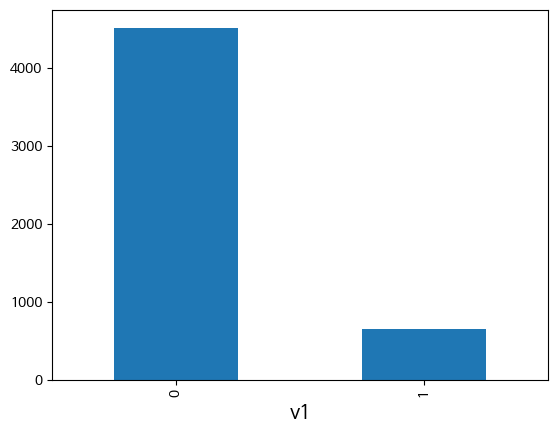

In [ ]:
print( f"v1 변수 데이터 분포 : {data[ 'v1' ].value_counts()}" )
data[ 'v1' ].value_counts().plot( kind = 'bar' )

In [ ]:
print( f'정상 메일 비율 : {round( data[ "v1" ].value_counts()[ 0 ] / len( data) * 100, 3 )}%' )
print( f'스팸 메일 비율 : {round( data[ "v1" ].value_counts()[ 1 ] / len( data) * 100, 3 )}%' )

정상 메일 비율 : 87.367%
스팸 메일 비율 : 12.633%


* 입력 데이터 / 정답 데이터 분리

In [ ]:
X_data = data[ 'v2' ]
y_data = data[ 'v1' ]

In [ ]:
print( f"입력 데이터( 메일 본문 ) 수 : {len( X_data )}" )
print( f"정답 데이터( 스팸 유무 ) 수 : {len( y_data )}" )

입력 데이터( 메일 본문 ) 수 : 5169
정답 데이터( 스팸 유무 ) 수 : 5169


* 훈련 / 테스트 데이터 분리

In [ ]:
# stratify = y_data : y_data 분포 비율에 따른 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size = 0.2, random_state = 42,
    stratify = y_data
)

In [ ]:
print( f'훈련 메일 비율 : {round( y_train.value_counts()[ 0 ] / len( y_train ) * 100, 3 )}%' )
print( f'훈련 스팸 비율 : {round( y_train.value_counts()[ 1 ] / len( y_train ) * 100, 3 )}%' )

훈련 메일 비율 : 87.376%
훈련 스팸 비율 : 12.624%


In [ ]:
print( f'테스트 메일 비율 : {round( y_test.value_counts()[ 0 ] / len( y_test ) * 100, 3 )}%' )
print( f'테스트 스팸 비율 : {round( y_test.value_counts()[ 1 ] / len( y_test ) * 100, 3 )}%' )

테스트 메일 비율 : 87.331%
테스트 스팸 비율 : 12.669%


### 텍스트 처리

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts( X_train )

# 훈련 입력 데이터 토큰화
X_train_encoded = tokenizer.texts_to_sequences( X_train )
print( X_train_encoded[ :5 ] )

[[281, 23, 44, 60, 3, 469, 107, 3487, 7, 3488, 180], [556, 23, 218, 752, 316], [12, 854, 583, 61, 24, 397, 2, 16, 1160, 30, 3, 67, 1160, 74, 65], [127, 37, 619, 620, 621, 17, 113, 62, 3489, 12, 142, 925, 4, 3490, 15, 3491, 855, 8, 38, 4, 3492, 201, 60, 1018, 33, 3, 55], [3493, 1335, 22, 2318]]


In [ ]:
# 단어 집합
word_to_index = tokenizer.word_index
print( word_to_index.items())

dict_items([('i', 1), ('to', 2), ('you', 3), ('a', 4), ('the', 5), ('u', 6), ('and', 7), ('in', 8), ('is', 9), ('me', 10), ('for', 11), ('my', 12), ('your', 13), ('it', 14), ('of', 15), ('have', 16), ('2', 17), ('that', 18), ('call', 19), ('on', 20), ('are', 21), ('now', 22), ('so', 23), ('not', 24), ('but', 25), ('can', 26), ("i'm", 27), ('or', 28), ('at', 29), ('do', 30), ('get', 31), ('will', 32), ('if', 33), ('we', 34), ('be', 35), ('just', 36), ('ur', 37), ('with', 38), ('no', 39), ('this', 40), ('up', 41), ('gt', 42), ('lt', 43), ('how', 44), ('when', 45), ('ok', 46), ('4', 47), ('from', 48), ('out', 49), ('go', 50), ('what', 51), ('all', 52), ('free', 53), ('know', 54), ('like', 55), ('got', 56), ('then', 57), ('good', 58), ('time', 59), ('come', 60), ('was', 61), ('am', 62), ('he', 63), ('its', 64), ('day', 65), ('there', 66), ('want', 67), ('text', 68), ('only', 69), ('love', 70), ('going', 71), ('send', 72), ('lor', 73), ('one', 74), ('by', 75), ('home', 76), ('as', 77), ('ne

* 훈련 데이터에 단어 등장 빈도 확인

In [ ]:
threshold = 2
total_cnt = len( word_to_index )    # 단어 수
rare_cnt = 0                        # 등장 빈도수가 threshold 보다 작은 단어 수
total_freq = 0                      # 훈련 데이터 전체 단어 빈도 수
rare_freq = 0                       # 등장 빈도수가 threshold 보다 작은 단어 수 합

In [ ]:
for key, value in tokenizer.word_counts.items():
    total_freq += value

    if ( value < threshold ):
        rare_cnt += 1
        rare_freq += value

print( f'등장 빈도 {threshold + 1}번 이하인 희귀 단어 수 : {rare_cnt}' )
print( f'단어 집합에서 희귀 단어 비율 : {rare_cnt / total_cnt * 100:.2f}%' )
print( f'전체 등장 빈도에서 희귀 단어 비율 : {rare_freq / total_freq * 100:.2f}%' )

등장 빈도 3번 이하인 희귀 단어 수 : 4329
단어 집합에서 희귀 단어 비율 : 55.39%
전체 등장 빈도에서 희귀 단어 비율 : 6.75%


In [ ]:
vocab_size = len( word_to_index ) + 1
print( f'단어 집합 크기 : {vocab_size}' )

단어 집합 크기 : 7816


메일 최대 길이 : 121
메일 평균 길이 : 15.515


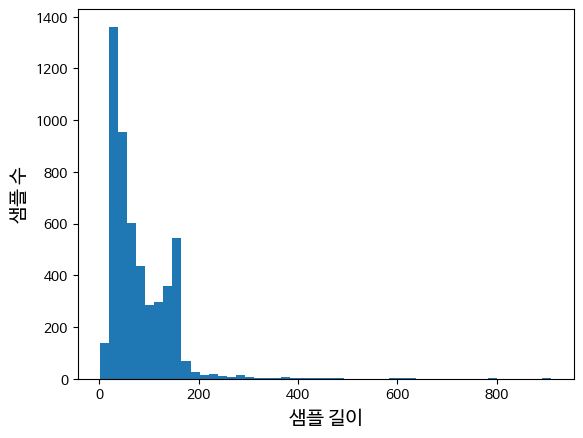

In [ ]:
print( f'메일 최대 길이 : {max( len( sample ) for sample in X_train_encoded)}' )
print( f'메일 평균 길이 : {sum( map( len, X_train_encoded )) / len( X_train_encoded):.3f}' )

plt.hist( [len( sample ) for sample in X_data ], bins = 50 )
plt.xlabel( '샘플 길이' )
plt.ylabel( '샘플 수' )
plt.show()

In [ ]:
max_len = 121
X_train_encoded = pad_sequences( X_train_encoded, maxlen = max_len )

print( f'훈련 데이터 크기 : {X_train_encoded.shape}' )

훈련 데이터 크기 : (4135, 121)


## 스팸 메일 분류를 위한 RNN 신경망 모델링

In [ ]:
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add( Embedding( vocab_size, embedding_dim ) )
model.add( SimpleRNN( hidden_units ) )
model.add( Dense( 1, activation = 'sigmoid' ) )

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          250112    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 252225 (985.25 KB)
Trainable params: 252225 (985.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile( optimizer = 'adam', loss = 'binary_crossentropy',
               metrics = [ 'accuracy' ] )
history = model.fit( X_train_encoded, y_train, epochs = 4,
                     batch_size = 64,
                     validation_split = 0.2 )

Epoch 1/4
52/52 [==============================] - 4s 40ms/step - loss: 0.4302 - accuracy: 0.8564 - val_loss: 0.3141 - val_accuracy: 0.8791
Epoch 2/4
52/52 [==============================] - 2s 36ms/step - loss: 0.2755 - accuracy: 0.9090 - val_loss: 0.1823 - val_accuracy: 0.9794
Epoch 3/4
52/52 [==============================] - 2s 33ms/step - loss: 0.1066 - accuracy: 0.9791 - val_loss: 0.0731 - val_accuracy: 0.9843
Epoch 4/4
52/52 [==============================] - 3s 54ms/step - loss: 0.0521 - accuracy: 0.9891 - val_loss: 0.0739 - val_accuracy: 0.9807


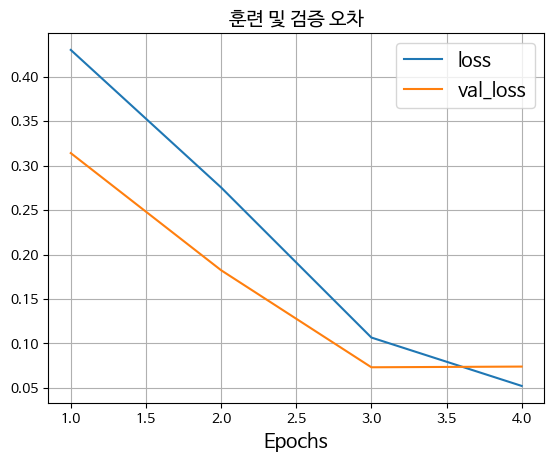

In [ ]:
disp_loss( history )

## 스팸 메일 분류를 위한 RNN 모델 평가

In [ ]:
X_test_encoded = tokenizer.texts_to_sequences( X_test )
X_test_encoded = pad_sequences( X_test_encoded )

loss, accuracy = model.evaluate( X_test_encoded, y_test, verbose = 0 )
print( f'accuracy : {accuracy:.3f}' )

accuracy : 0.976
